In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cus=pd.read_csv("Customer.csv")

In [3]:
prod=pd.read_csv("prod_cat_info.csv")

In [4]:
trans=pd.read_csv("Transactions.csv")

In [5]:
cus.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [6]:
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [7]:
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [8]:
merged_df = pd.merge(trans, cus, left_on='cust_id', right_on='customer_Id', how='inner')

In [9]:
merged_df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,270351,26-09-1981,M,5.0
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,270351,26-09-1981,M,5.0


In [10]:
Customer_final = pd.merge(merged_df, prod, how='left', left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'])

In [11]:
Customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0,Footwear,3,Women
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,270351,26-09-1981,M,5.0,Electronics,8,Personal Appliances
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,270351,26-09-1981,M,5.0,Books,6,DIY


In [12]:
Customer_final.duplicated().sum()

13

In [13]:
Customer_final.drop_duplicates(inplace=True)

In [15]:
Customer_final.isna().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
customer_Id          0
DOB                  0
Gender               9
city_code            8
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [16]:
Customer_final.dropna(inplace=True)

In [17]:
Customer_final.shape[0]

23023

In [18]:
# 2. a Get the column names and their corresponding data types

Customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23023 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23023 non-null  int64  
 1   cust_id            23023 non-null  int64  
 2   tran_date          23023 non-null  object 
 3   prod_subcat_code   23023 non-null  int64  
 4   prod_cat_code      23023 non-null  int64  
 5   Qty                23023 non-null  int64  
 6   Rate               23023 non-null  int64  
 7   Tax                23023 non-null  float64
 8   total_amt          23023 non-null  float64
 9   Store_type         23023 non-null  object 
 10  customer_Id        23023 non-null  int64  
 11  DOB                23023 non-null  object 
 12  Gender             23023 non-null  object 
 13  city_code          23023 non-null  float64
 14  prod_cat           23023 non-null  object 
 15  prod_sub_cat_code  23023 non-null  int64  
 16  prod_subcat        23023 no

In [19]:
# b Top/Bottom 10 observations

Customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0,Footwear,3,Women
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,270351,26-09-1981,M,5.0,Electronics,8,Personal Appliances
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,270351,26-09-1981,M,5.0,Books,6,DIY
5,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
6,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
7,92734514344,270384,26-10-2013,1,4,2,1362,286.020,3010.020,TeleShop,270384,11-05-1973,F,8.0,Bags,1,Mens
8,865952996,270384,6/8/2013,12,6,2,86,18.060,190.060,MBR,270384,11-05-1973,F,8.0,Home and kitchen,12,Tools
9,4116651679,270384,6/8/2013,6,5,1,1343,141.015,1484.015,TeleShop,270384,11-05-1973,F,8.0,Books,6,DIY


In [20]:
Customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,11090753771,270827,8/2/2011,1,1,3,74,23.310,245.310,e-Shop,270827,04-03-1970,F,10.0,Clothing,1,Women
23044,85951181720,267166,8/2/2011,5,3,3,1137,358.155,3769.155,MBR,267166,22-02-1970,F,4.0,Electronics,5,Computers
23045,79685748610,272539,5/2/2011,7,5,2,94,19.740,207.740,TeleShop,272539,23-05-1977,F,7.0,Books,7,Fiction
23046,23353379671,273036,4/2/2011,10,3,3,209,65.835,692.835,e-Shop,273036,09-11-1971,F,2.0,Electronics,10,Audio and video
23047,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,272706,09-03-1974,M,8.0,Bags,1,Mens
23048,16293185603,274931,31-01-2011,8,3,3,137,43.155,454.155,Flagship store,274931,10-06-1972,M,10.0,Electronics,8,Personal Appliances
23049,70163958026,267902,30-01-2011,10,5,4,404,169.680,1785.680,e-Shop,267902,17-07-1975,M,4.0,Books,10,Non-Fiction
23050,20417144530,269556,29-01-2011,10,6,3,654,206.010,2168.010,Flagship store,269556,27-12-1972,M,5.0,Home and kitchen,10,Kitchen
23051,58531412371,274935,29-01-2011,10,5,4,104,43.680,459.680,Flagship store,274935,09-09-1977,F,3.0,Books,10,Non-Fiction
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,273723,21-01-1984,F,4.0,Bags,4,Women


In [37]:
Customer_final[['Qty', 'Rate', 'Tax', 'total_amt']].describe()


,Qty,Rate,Tax,total_amt
count,23023.000000,23023.000000,23023.000000,23023.000000
mean,2.435868,637.116840,248.701263,2109.881471
std,2.264415,621.870539,187.196950,2505.929444
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1756.950000
75%,4.000000,1110.000000,365.820000,3570.255000
max,5.000000,1500.000000,787.500000,8287.500000


In [39]:
#  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

summary = Customer_final[['Qty', 'Rate', 'Tax', 'total_amt']].describe().loc[['min', '25%', '50%', '75%', 'max']]
print(summary)


     Qty    Rate     Tax  total_amt
min -5.0 -1499.0    7.35  -8270.925
25%  1.0   312.0   98.28    762.450
50%  3.0   710.0  199.08   1756.950
75%  4.0  1110.0  365.82   3570.255
max  5.0  1500.0  787.50   8287.500


In [42]:
# List of categorical column names
categorical_columns = ['Store_type', 'prod_cat', 'prod_subcat','Qty']

# Initialize an empty dictionary to store frequency tables
frequency_tables = {}

# Loop through each categorical column
for column in categorical_columns:
    # Calculate the frequency of each unique value in the column
    frequency_table = Customer_final[column].value_counts()
    
    # Store the frequency table in our dictionary
    frequency_tables[column] = frequency_table

# Now, let's print each frequency table with a clear label
for column, frequency_table in frequency_tables.items():
    print(f"Frequency Table for {column}:\n")
    print(frequency_table)
    print("\n")


Frequency Table for Store_type:

Store_type
e-Shop            9299
MBR               4658
Flagship store    4573
TeleShop          4493
Name: count, dtype: int64


Frequency Table for prod_cat:

prod_cat
Books               6061
Electronics         4891
Home and kitchen    4123
Footwear            2995
Clothing            2957
Bags                1996
Name: count, dtype: int64


Frequency Table for prod_subcat:

prod_subcat
Women                  3044
Mens                   2909
Kids                   1995
Tools                  1061
Fiction                1042
Kitchen                1036
Children               1034
Mobiles                1030
Comics                 1030
Bath                   1020
Furnishing             1006
Non-Fiction            1001
DIY                     988
Cameras                 984
Personal Appliances     970
Academic                966
Computers               956
Audio and video         951
Name: count, dtype: int64


Frequency Table for Qty:

Qty
 5    4257

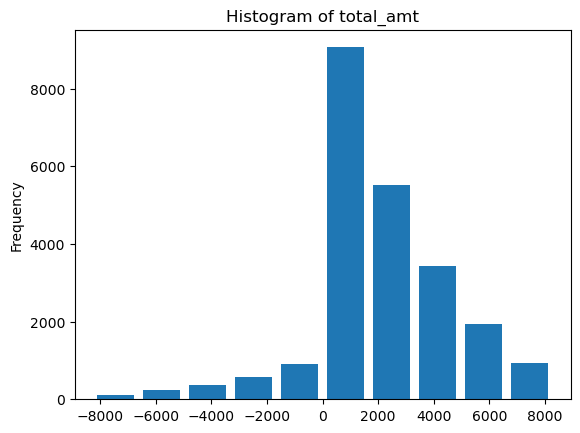

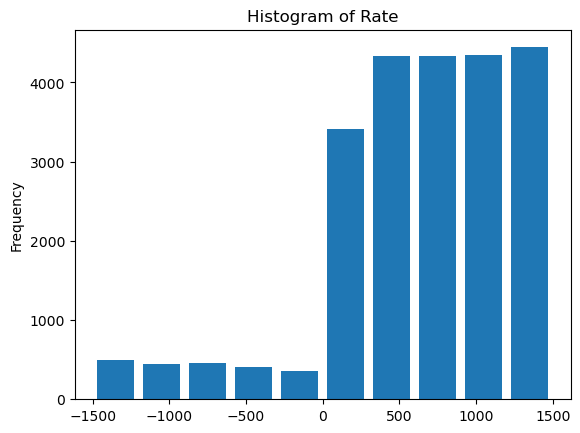

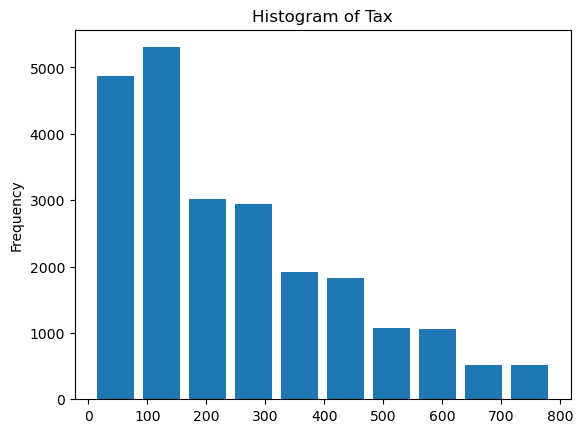

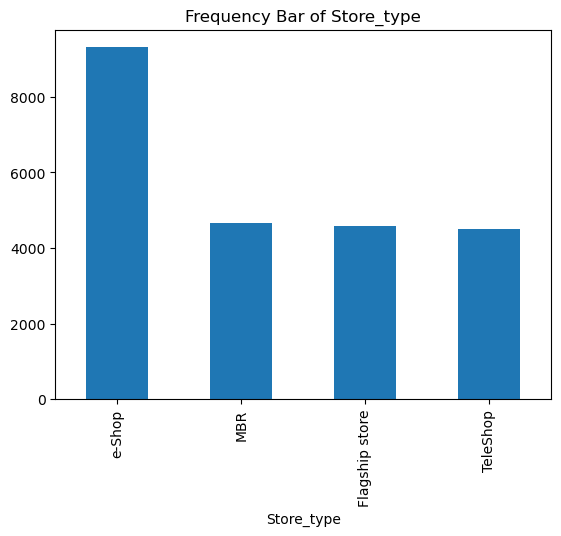

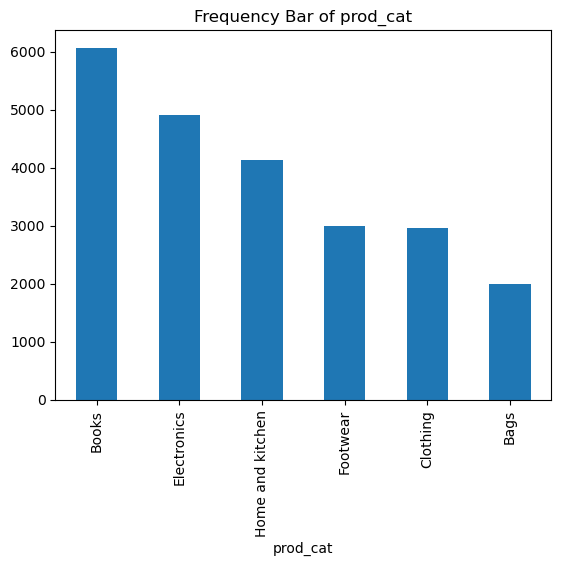

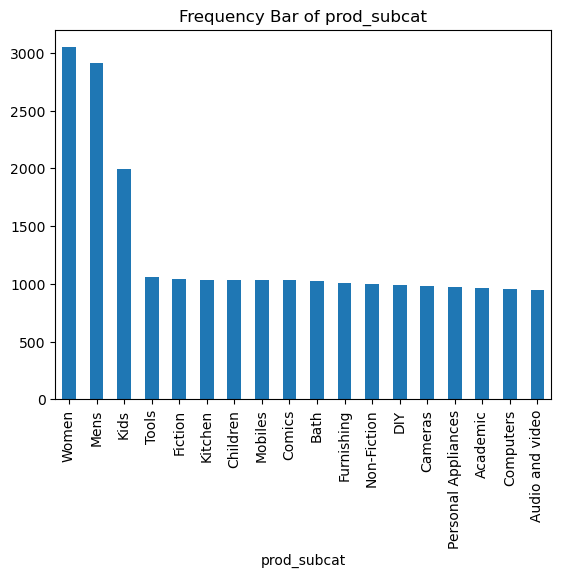

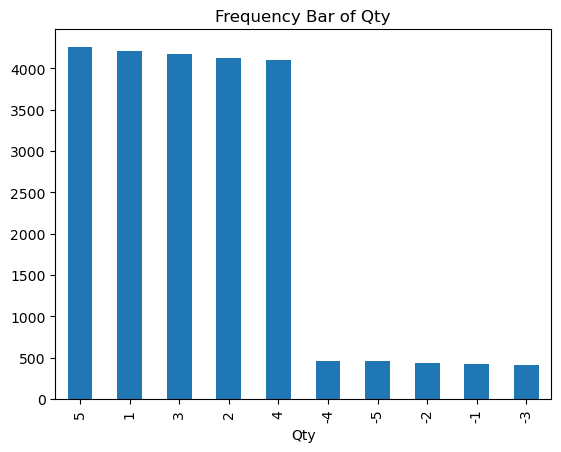

In [56]:
#3. Generate histograms for all continuous variables and frequency bars for categorical variables.

# List of continuous and categorical columns
continuous_columns = ['total_amt', 'Rate','Tax']  
categorical_columns = ['Store_type', 'prod_cat','prod_subcat','Qty']  

# Generate histograms for continuous variables
for column in continuous_columns:
    plt.figure()
    Customer_final[column].plot(kind='hist', rwidth=0.8)
    plt.title(f'Histogram of {column}')
    plt.show()

# Generate frequency bars for categorical variables
for column in categorical_columns:
    plt.figure()
    Customer_final[column].value_counts().plot(kind='bar')
    plt.title(f'Frequency Bar of {column}')
    plt.show()


In [23]:

#4. Calculate the following information using the merged dataset :
   #a. Time period of the available transaction data# Import the necessary library

#Convert Date column in object format to Dateformat
from dateutil.parser import parse
def parse_dates(date):
    return parse(date, dayfirst=True)

Customer_final['tran_date'] = Customer_final['tran_date'].apply(parse_dates)

# Find the minimum and maximum dates in the DataFrame
start_date = Customer_final['tran_date'].min()
end_date = Customer_final['tran_date'].max()

# Calculate the time period
time_period = end_date - start_date

print("Start Date:", start_date)
print("End Date:", end_date)
print("Time Period:", time_period)



Start Date: 2011-01-25 00:00:00
End Date: 2014-02-28 00:00:00
Time Period: 1130 days 00:00:00


In [24]:
# 4b. Count of transactions where the total amount of transaction was negative

# Filter rows where 'total_amt' is negative
negative_transactions = Customer_final[Customer_final['total_amt'] < 0]

# # Count the number of negative transactions
count_negative_transactions = len(negative_transactions)

print(f"Count of transactions with negative total amount: {count_negative_transactions}")

Count of transactions with negative total amount: 2163


In [25]:
# 5.Analyze which product categories are more popular among females vs male customers

# Group the data by gender and product category and calculate counts or quantities
gender_category_counts = Customer_final.groupby(['Gender', 'prod_cat'])['Qty'].sum().unstack(fill_value=0)

# Print the resulting DataFrame
print(gender_category_counts)

prod_cat  Bags  Books  Clothing  Electronics  Footwear  Home and kitchen
Gender                                                                  
F         2364   7080      3425         5827      3721              4898
M         2345   7586      3748         6480      3561              5046


In [26]:
# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

# Select the 'customer_Id' column
customer_ids = Customer_final['customer_Id']

# Group by 'city_code'
grouped = customer_ids.groupby(Customer_final['city_code'])

# Count unique 'customer_Id's in each group
city_customer_counts = grouped.nunique()

# Find the city code with the maximum number of customers
max_customers_city = city_customer_counts.idxmax()

# Calculate the percentage of customers from that city
total_customers = Customer_final['customer_Id'].nunique()
percentage_max_customers = (city_customer_counts[max_customers_city] / total_customers) * 100


print("City Code with Maximum Customers:", max_customers_city)
print("Percentage of Customers from that City:", percentage_max_customers)

City Code with Maximum Customers: 3.0
Percentage of Customers from that City: 10.468920392584515


In [27]:
# 7. Which store type sells the maximum products by value and by quantity?

# Group the data by 'Store_type' and calculate the sum of quantity and total amount for each store type
store_type_quantity = Customer_final.groupby('Store_type')['Qty'].sum()
store_type_value = Customer_final.groupby('Store_type')['total_amt'].sum()

# Find the store type with the maximum quantity sold
max_quantity_store_type = store_type_quantity.idxmax()

# Find the store type with the maximum value sold
max_value_store_type = store_type_value.idxmax()

# Print the results
print("Store Type with Maximum Quantity Sold:", max_quantity_store_type)
print("Store Type with Maximum Value Sold:", max_value_store_type)

Store Type with Maximum Quantity Sold: e-Shop
Store Type with Maximum Value Sold: e-Shop


In [28]:
# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

# Filter the data for "Electronics" and "Clothing" categories and "Flagship Store" type
filtered_data = Customer_final[(Customer_final['prod_cat'].isin(['Electronics', 'Clothing'])) & (Customer_final['Store_type'] == 'Flagship store')]

# Calculating the total amount earned
total_amount_earned = filtered_data['total_amt'].sum()

# Print the total amount earned
print("Total Amount Earned from 'Electronics' and 'Clothing' Categories in 'Flagship Store':", total_amount_earned)


Total Amount Earned from 'Electronics' and 'Clothing' Categories in 'Flagship Store': 3408936.05


In [29]:
# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

# Filter the data for "Male" customers and "Electronics" category
filtered_data = Customer_final[(Customer_final['Gender'] == 'M') & (Customer_final['prod_cat'] == 'Electronics')]

# Calculating the total amount earned
total_amount_earned = filtered_data['total_amt'].sum()

# Print the total amount earned
print("Total Amount Earned from 'Male' Customers in 'Electronics' Category:", total_amount_earned)

Total Amount Earned from 'Male' Customers in 'Electronics' Category: 5705871.925000001


In [30]:
# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

# Remove transactions with negative amounts
final_positive = Customer_final[Customer_final['total_amt'] >= 0]

# Group the data by customer ID and count unique transactions
customer_transaction_counts = final_positive.groupby('customer_Id')['transaction_id'].nunique()

# Filter customers with more than 10 unique transactions
customers_with_more_than_10_transactions = customer_transaction_counts[customer_transaction_counts > 10]

# Count the number of customers meeting the criteria
num_customers_with_more_than_10_transactions = len(customers_with_more_than_10_transactions)

# Print the result
print("Number of Customers with More Than 10 Unique Transactions (after removing negative transactions):", num_customers_with_more_than_10_transactions)


Number of Customers with More Than 10 Unique Transactions (after removing negative transactions): 6


In [31]:
# 11. For all customers aged between 25 - 35, find out:
#  a. What was the total amount spent for “Electronics” and “Books” product categories?

# Convert 'DOB' to datetime format using parse_dates UDF 

Customer_final['DOB'] = Customer_final['DOB'].apply(parse_dates)

# Calculate the age of each customer
Customer_final['age'] = (Customer_final['tran_date'] - Customer_final['DOB']).dt.days // 365

# Filter customers aged between 25 and 35
filtered_data = Customer_final[(Customer_final['age'] >= 25) & (Customer_final['age'] <= 35)]

# Filter rows for "Electronics" and "Books" product categories
selected_categories = ["Electronics", "Books"]
filtered_data = filtered_data[filtered_data['prod_cat'].isin(selected_categories)]

# Calculate the total amount spent for these product categories
total_amount_spent = filtered_data.groupby('prod_cat')['total_amt'].sum()

print("Total amount spent for Electronics and Books:")
print(total_amount_spent)


Total amount spent for Electronics and Books:
prod_cat
Books          6121285.625
Electronics    5085331.550
Name: total_amt, dtype: float64


In [32]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014

# Filter customers aged between 25 and 35 at the time of transaction
filtered_customers = Customer_final[(Customer_final['age'] >= 25) & (Customer_final['age'] <= 35)]

# Filter transactions between 1st Jan, 2014 to 1st Mar, 2014
start_date = '2014-01-01'
end_date = '2014-03-01'
filtered_transactions = filtered_customers[(filtered_customers['tran_date'] >= start_date) & (filtered_customers['tran_date'] <= end_date)]

# Calculate total amount spent
total_amount_spent = filtered_transactions['total_amt'].sum()

print(f"The total amount spent by customers aged between 25 and 35 from 1st Jan, 2014 to 1st Mar, 2014 is: {total_amount_spent}")


The total amount spent by customers aged between 25 and 35 from 1st Jan, 2014 to 1st Mar, 2014 is: 1074823.555
